In [17]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [18]:
dataset = pd.read_csv("gas_turbines.csv")
dataset

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [19]:
dataset.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [23]:
dataset.shape

(15039, 11)

In [24]:
dataset.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [25]:
dataset['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [26]:
len(dataset['TEY'].unique())

4207

In [27]:
dataset.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

<AxesSubplot:>

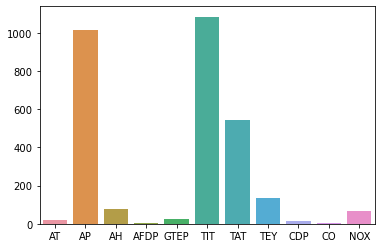

In [28]:
sns.barplot(data=dataset)

<AxesSubplot:>

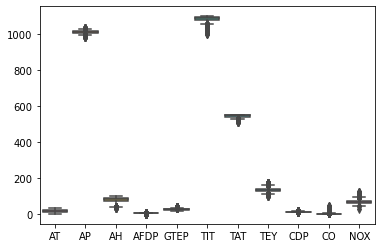

In [29]:
sns.boxplot(data=dataset)

In [31]:
features = dataset.columns.tolist()
features.remove('TEY')
features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']

In [32]:
X=dataset.drop(columns =['TEY'])
y=dataset['TEY']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =42)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 10), (4512, 10), (10527,), (4512,))

In [35]:
features =X.shape[1]
features

10

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
import tensorflow

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
import tensorflow
import tensorflow as tf
from tensorflow import keras

In [38]:
optmizer =RMSprop(0.03)
model=keras.Sequential([
    keras.layers.Dense(10,input_dim =(features),activation='relu'),
    keras.layers.Dense(8,activation ='relu')
])
model.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])

In [39]:
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model.fit(X_train, y_train, epochs=5, batch_size=30, verbose = 1)

Epoch 1/5
351/351 [==============================] - 6s 3ms/step - loss: 7827.1104 - accuracy: 0.0000e+00
Epoch 2/5
351/351 [==============================] - 1s 2ms/step - loss: 7137.9312 - accuracy: 0.0000e+00
Epoch 3/5
351/351 [==============================] - 1s 2ms/step - loss: 7119.5317 - accuracy: 0.0000e+00
Epoch 4/5
351/351 [==============================] - 1s 2ms/step - loss: 7104.6826 - accuracy: 0.0000e+00
Epoch 5/5
351/351 [==============================] - 1s 3ms/step - loss: 7093.9824 - accuracy: 0.0000e+00


In [40]:
model.evaluate(X_test,y_test)

141/141 [==============================] - 1s 3ms/step - loss: 6990.2959 - accuracy: 0.0000e+00


[6990.2958984375, 0.0]

In [41]:
optmizer =RMSprop(0.5)
model=keras.Sequential([
    keras.layers.Dense(10,input_dim =(features),activation='relu'),
    keras.layers.Dense(8,activation ='relu')
])
model.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])

In [42]:
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose = 1)

Epoch 1/10
1053/1053 [==============================] - 4s 3ms/step - loss: 28862.6113 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6201 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6484 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6338 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6094 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6621 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.5820 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 3s 3ms/step - loss: 16027.6562 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6348 - accuracy: 0.0000e+00
Epoch 10/1

In [43]:
model.evaluate(X_test,y_test)

141/141 [==============================] - 1s 2ms/step - loss: 15956.8740 - accuracy: 0.0000e+00


[15956.8740234375, 0.0]

In [44]:
y_pred = model.predict(X_test)

141/141 [==============================] - 1s 2ms/step


In [45]:
y_pred

array([[  0.     ,   0.     ,   0.     , ..., 134.27095,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ..., 134.27095,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ..., 134.27095,   0.     ,
          0.     ],
       ...,
       [  0.     ,   0.     ,   0.     , ..., 134.27095,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ..., 134.27095,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ..., 134.27095,   0.     ,
          0.     ]], dtype=float32)